## *Maryam Mounad - Muhammad Humza Arain - Mahak Nadeem*

# Exercise 1: RNNs, and Transformers Foundation (10 Points)

# 1. RNN Basics: (2 Points)
**Explain the structure and functioning of a basic Recurrent Neural Network (RNN) cell. What are the key components that enable RNNs to process sequential data effectively?**



Recurrent Neural Networks (RNNs) are designed to process sequences by maintaining a memory of past information through hidden states.

##  Core Components

###  Hidden State (\( h_t \))
- Stores information from previous time steps.
- Acts as the memory of the network.

###  Input & Recurrent Weights
- \( W_x \): Weight matrix for current input \( x_t \)
- \( W_h \): Weight matrix for previous hidden state \( h_{t-1} \)
- \( b \): Bias term

####  Affine Transformation:
$$
a_t = W_x x_t + W_h h_{t-1} + b
$$

###  Activation Function
- Applies a non-linearity (e.g., `tanh` or `ReLU`) to enable learning of complex patterns.

####  Hidden State Update:
$$
h_t = \sigma(a_t)
$$

###  Optional Output Layer
- Maps hidden state to output using:
$$
y_t = \text{softmax}(W_y h_t + b_y)
$$




##  Key Use Cases
- Language modeling  
- Time series forecasting  
- Music generation  
- Sequence labeling tasks (e.g., POS tagging)

---



# 2. Comparative Analysis: LSTM vs. GRU vs. Classic RNN: (2 Points)

 Recurrent Neural Network Cell Comparison


##  i. Cell Structure and Flow of Information

###  Classic RNN
- **State update**:  
  $$ h_t = \sigma(W_x x_t + W_h h_{t-1} + b) $$
- **No gating**: All inputs blend uniformly with memory.

###  GRU (Gated Recurrent Unit)
- **Update gate** \( z_t \): controls how much previous state to retain  
- **Reset gate** \( r_t \): modulates memory contribution

- **New state**:  
  $$ h_t = z_t \odot h_{t-1} + (1 - z_t) \odot \tilde{h}_t $$
  where  
  $$ \tilde{h}_t = \tanh(W_x x_t + W_h (r_t \odot h_{t-1})) $$

###  LSTM (Long Short-Term Memory)
- **Gates**: Forget \( f_t \), Input \( i_t \), Output \( o_t \)  
- **Cell state** \( c_t \): Maintains long-term context

- **Updates**:  
  $$ c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t $$  
  $$ h_t = o_t \odot \tanh(c_t) $$



##  ii. Handling the Vanishing Gradient

| Model      | Gradient Flow                          |
|------------|----------------------------------------|
| RNN        |  Exponentially vanishing gradients    |
| GRU        |  Gates act as gradient shortcuts     |
| LSTM       |  Strong gradient preservation via cell state |



##  iii. Capturing Long-Term Dependencies

| Model      | Dependency Reach                        |
|------------|------------------------------------------|
| RNN        | ~10–20 steps (limited)                   |
| GRU        | Moderate (~100 steps)                    |
| LSTM       | Long-range (100s to 1000s of steps)      |



##  iv. Computational Efficiency During Training

| Model      | Parameters | Speed/Step | Training Convergence |
|------------|------------|------------|----------------------|
| RNN        | Few        |  Fast     |  Needs more epochs |
| GRU        | Medium     |  Moderate |  Fast convergence  |
| LSTM       | Most       |  Slower   |  Efficient for long-range |

---


# 3. Attention Mechanism in Transformers: (2 Points)



##  Self-Attention

- Each token attends to every other token in the same sequence.
- Context is built in **parallel** rather than step-by-step (vs. RNNs).
- Enables direct modeling of long-range dependencies.
- Highly parallelizable for GPU acceleration.



##  Query, Key, Value (Q/K/V)

- **Query (Q)**: Represents "what I'm looking for" at a given position.
- **Key (K)**: Represents "what each position offers" for matching.
- **Value (V)**: Carries the actual content to be aggregated.


##  Attention Weights Calculation

###  Scaled Dot-Product:
$$
\text{score}_{i,j} = \frac{Q_i \cdot K_j}{\sqrt{d_k}}
$$

- Apply masks (e.g. ignore padding or look-ahead).
- Use **softmax** to normalize attention weights across positions.

###  Output:
$$
\text{Attention}(Q, K, V) = \text{softmax}\left( \frac{QK^T}{\sqrt{d_k}} \right) V
$$



##  Multi-Head Attention

- Run **multiple attention heads** in parallel:
  - Each head has its own Q/K/V linear projections.
  - Captures diverse relationships from different representation subspaces.

- **Process:**
  1. Compute attention per head.
  2. Concatenate head outputs.
  3. Project the combined output through a final linear layer.


##  Benefits of Transformer Attention

- Captures both **local and global** context effectively.
- Scales well with longer sequences.
- Foundation of architectures like **BERT**, **GPT**, **ViT**, etc.

---



# 4. Transformer vs. RNNs (Classic RNN, GRU, LSTM): (2 Points)


##  Long-Range Dependencies

###  RNNs (incl. GRUs/LSTMs)
- Process input **step-by-step** using hidden state \( h_t \).
- Difficult to retain signals across **many timesteps**.
- Gating (in GRUs/LSTMs) helps, but still limited by sequential nature.

###  Transformers
- Use **self-attention**: each token connects directly with every other token.
- Easily capture relationships across **long distances**.
- One-step contextualization across entire sequence.



##  Parallelization

###  RNNs
- **Sequential** by design—each step relies on the previous.
- Hard to parallelize → **slow training** on GPUs/TPUs.

###  Transformers
- Remove recurrence: all tokens processed **simultaneously**.
- Heavy use of matrix operations → **massive speed-ups** on parallel hardware.

---


#   5. Application Scenarios: (2 Points)



##  Classic RNN

###  Example Task:
Real-time keyword spotting on low-power devices  
(e.g., “Hey Siri” detection on wearables)

###  Why It Fits:
- Very lightweight with few parameters  
- Simple step-by-step recurrence  
- Minimal memory & compute → suitable for short streaming inputs

###  Limitations:
- Poor performance on long-range dependencies  
- Struggles with context beyond a few time steps



##  GRU (Gated Recurrent Unit)

###  Example Task:
Part-of-speech tagging or named-entity recognition  
in moderately sized corpora

### Why It Fits:
- Gating mechanisms improve memory over tens of tokens  
- Simpler than LSTM → faster training, lower memory use  
- Balanced performance vs. efficiency

###  Limitations:
- Still sequential → slower training/inference than parallel models  
- Long-range dependencies (>100 tokens) can weaken performance



##  LSTM (Long Short-Term Memory)

###  Example Task:
Language modeling and text generation  
(e.g., autocomplete, poetry generation)

###  Why It Fits:
- Explicit cell state retains memory across hundreds of steps  
- Advanced gating: forget, input, output  
- Strong performance in sequence-to-sequence tasks  
  (e.g., early MT systems, speech synthesis)

###  Limitations:
- Heavier model: more parameters, slower per time step  
- Still sequential → limited parallelism



## Transformer

###  Example Task:
Machine translation, summarization, QA, large-scale pretraining  
(e.g., BERT, GPT)

###  Why It Fits:
- Self-attention captures global context in one step  
- Fully parallel → leverages GPU/TPU acceleration  
- Scalable modular design → supports billions of parameters  
- State-of-the-art across nearly all NLP tasks

###  Limitations:
- Quadratic memory in sequence length (full pairwise attention)  
- Efficient-attention variants help reduce this cost



##  Summary 

| Model       | Task Example                   | Strengths                      | Weaknesses                     |
|-------------|--------------------------------|-------------------------------|-------------------------------|
| RNN         | Keyword spotting               | Lightweight, simple            | Weak long-range memory        |
| GRU         | POS tagging, NER               | Balanced, faster than LSTM     | Limited parallelism           |
| LSTM        | Language modeling, generation  | Long-term memory, robust       | Slow, many parameters         |
| Transformer | MT, QA, summarization          | Fast, scalable, powerful       | High memory usage (quadratic) |

---



## Ex.2 

### 1.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('drugsComTrain_raw.csv', sep=',')

# Create sentiment classes
df['sentiment'] = pd.cut(df['rating'], 
                         bins=[0, 4, 6, 10], 
                         labels=['negative', 'neutral', 'positive'])

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])

# Split data (using 10% of data)
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

### 2.

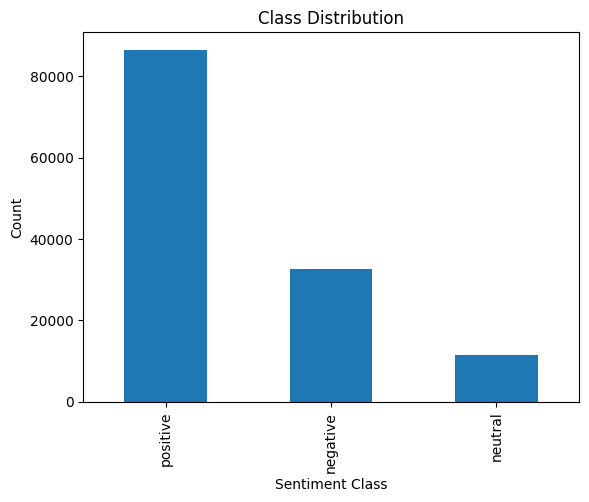

In [2]:
import matplotlib.pyplot as plt

# Plot class distribution
train_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

### 3.

In [ ]:
from transformers import AutoModel, AutoTokenizer

model_name = "boltuix/NeuroBERT-Tiny"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)